In [53]:
import skimage
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
import cv2


# Task 1

In [82]:
def rgb_to_hsv(image):
    red = image[:,:,0]
    green = image[:,:,1]
    blue = image[:,:,2]

    rp = red/255
    gp = green/255
    bp = blue/255

    cmin = np.argmin(image, axis=2)
    cmax = np.argmax(image, axis=2)

    cmin_val = np.amin(image, axis=2)
    cmax_val = np.amax(image, axis=2)

    delta = cmax_val - cmin_val
    h = np.zeros((image.shape[0], image.shape[1]), dtype='float')
    h[np.where(delta == 0)] = 0
    h[np.where(cmax == 0)] = 60 * ((gp[np.where(cmax == 0)]-bp[np.where(cmax == 0)])/delta[np.where(cmax == 0)] % 6)
    h[np.where(cmax == 1)] = 60 * ((bp[np.where(cmax == 1)]-rp[np.where(cmax == 1)])/delta[np.where(cmax == 1)] + 2)
    h[np.where(cmax == 2)] = 60 * ((rp[np.where(cmax == 2)]-gp[np.where(cmax == 2)])/delta[np.where(cmax == 2)] + 4)

    v = cmax_val
    s = np.zeros((image.shape[0], image.shape[1]), dtype='float')
    s[np.where(cmax_val != 0)] = delta[np.where(cmax_val != 0)] / cmax_val[np.where(cmax_val != 0)]
#     s = np.clip(s, 0, 1)
    image_hsv = np.concatenate((h[..., np.newaxis], s[...,np.newaxis], v[...,np.newaxis]), axis=-1)
    return image_hsv

In [83]:
def plot_image(path):
    fig, (ax0, ax1) = plt.subplots(1, 2)
    img = io.imread(path)
    ax0.imshow(color.rgb2hsv(img))
    ax0.set_title('OpenCV rgb2hsv()')
    ax0.axis('off')
              
    ax1.imshow(rgb_to_hsv(img))
    ax1.set_title('My rgb_to_hsv()')
    ax1.axis('off')
   

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in remainder
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


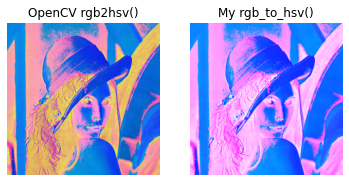

In [84]:
plot_image('Lenna.png')

In [85]:
img = io.imread('Lenna.png')
print(color.rgb2hsv(img)[0, 0, :])
print(rgb_to_hsv(img)[0, 0, :])

[0.0387931  0.51101322 0.89019608]


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in remainder


[5.47667343e-02 5.11013216e-01 2.27000000e+02]


# Task 2

In [55]:
def contrast_brightness(contrast, brightness, image):
    image = io.imread(image)
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(contrast * image[y,x,c] + brightness, 0, 255)
    return new_image

(-0.5, 729.5, 722.5, -0.5)

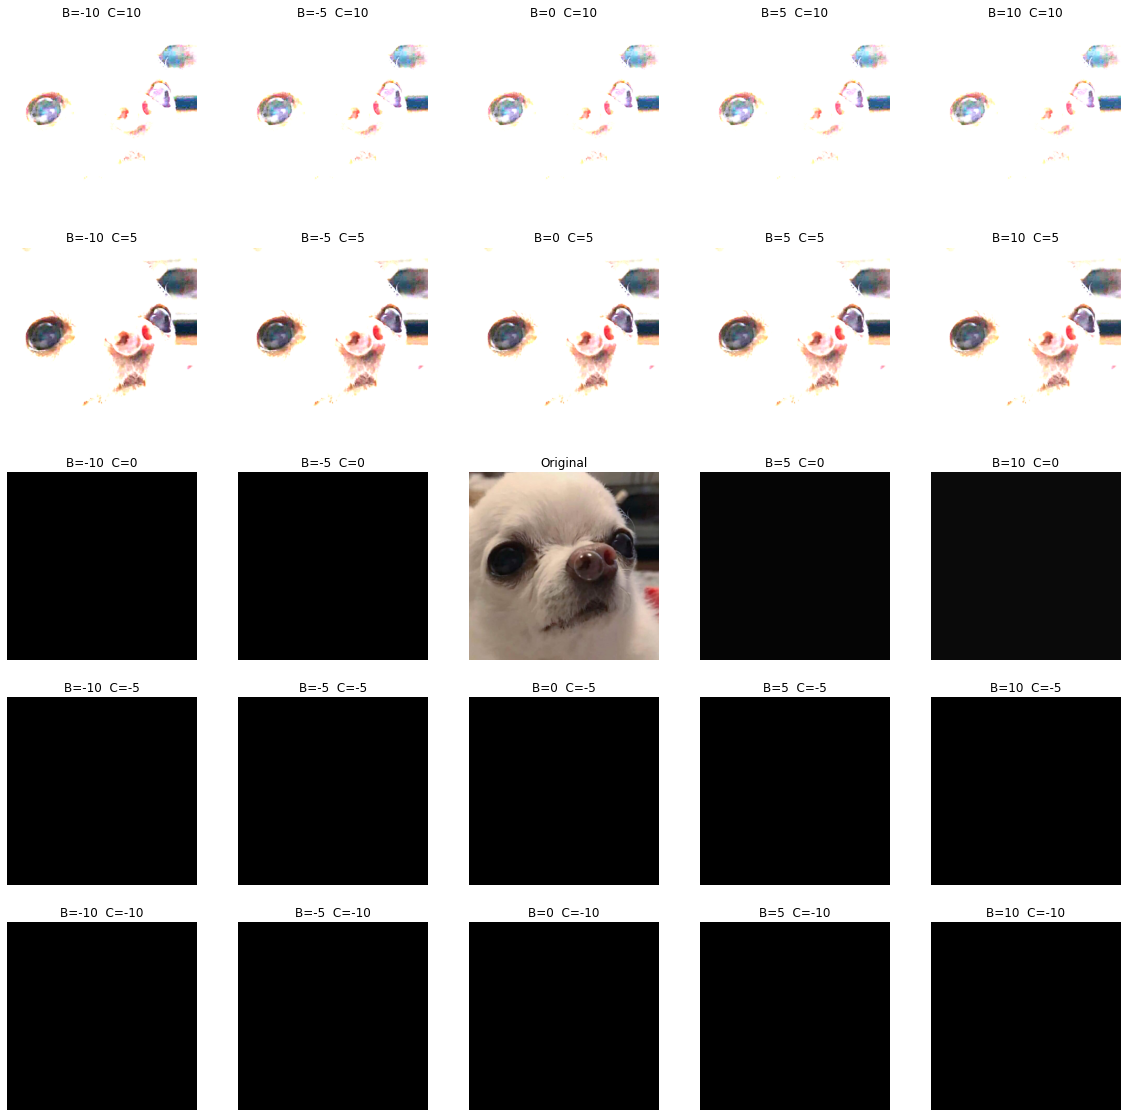

In [56]:
fig, ((ax1, ax2, ax3, ax4, ax5), 
      (ax6, ax7, ax8, ax9, ax10), 
      (ax11, ax12, ax13, ax14, ax15), 
      (ax16, ax17, ax18, ax19, ax20), 
      (ax21, ax22, ax23, ax24, ax25) ) = plt.subplots(ncols=5, nrows=5, figsize=(20,20))

im1 = contrast_brightness(10, -10, '1.jpg')
ax1.imshow(im1)
ax1.set_title('B=-10  C=10')
ax1.axis('off')

im2 = contrast_brightness(10, -5, '1.jpg')
ax2.imshow(im2)
ax2.set_title('B=-5  C=10')
ax2.axis('off')

im3 = contrast_brightness(10, 0, '1.jpg')
ax3.imshow(im3)
ax3.set_title('B=0  C=10')
ax3.axis('off')

im4 = contrast_brightness(10, 5, '1.jpg')
ax4.imshow(im4)
ax4.set_title('B=5  C=10')
ax4.axis('off')

im5 = contrast_brightness(10, 10, '1.jpg')
ax5.imshow(im5)
ax5.set_title('B=10  C=10')
ax5.axis('off')

im6 = contrast_brightness(5, -10, '1.jpg')
ax6.imshow(im6)
ax6.set_title('B=-10  C=5')
ax6.axis('off')

im7 = contrast_brightness(5, -5, '1.jpg')
ax7.imshow(im7)
ax7.set_title('B=-5  C=5')
ax7.axis('off')

im8 = contrast_brightness(5, 0, '1.jpg')
ax8.imshow(im8)
ax8.set_title('B=0  C=5')
ax8.axis('off')

im9 = contrast_brightness(5, 5, '1.jpg')
ax9.imshow(im9)
ax9.set_title('B=5  C=5')
ax9.axis('off')

im10 = contrast_brightness(5, 10, '1.jpg')
ax10.imshow(im10)
ax10.set_title('B=10  C=5')
ax10.axis('off')


im11 = contrast_brightness(0, -10, '1.jpg')
ax11.imshow(im11)
ax11.set_title('B=-10  C=0')
ax11.axis('off')

im12 = contrast_brightness(0, -5, '1.jpg')
ax12.imshow(im12)
ax12.set_title('B=-5  C=0')
ax12.axis('off')

im13 = io.imread('1.jpg')
ax13.imshow(im13)
ax13.set_title('Original')
ax13.axis('off')

im14 = contrast_brightness(0, 5, '1.jpg')
ax14.imshow(im14)
ax14.set_title('B=5  C=0')
ax14.axis('off')

im15 = contrast_brightness(0, 10, '1.jpg')
ax15.imshow(im15)
ax15.set_title('B=10  C=0')
ax15.axis('off')

im16 = contrast_brightness(-5, -10, '1.jpg')
ax16.imshow(im16)
ax16.set_title('B=-10  C=-5')
ax16.axis('off')

im17 = contrast_brightness(-5, -5, '1.jpg')
ax17.imshow(im17)
ax17.set_title('B=-5  C=-5')
ax17.axis('off')

im18 = contrast_brightness(-5, 0, '1.jpg')
ax18.imshow(im18)
ax18.set_title('B=0  C=-5')
ax18.axis('off')

im19 = contrast_brightness(-5, 5, '1.jpg')
ax19.imshow(im19)
ax19.set_title('B=5  C=-5')
ax19.axis('off')

im20 = contrast_brightness(-5, 10, '1.jpg')
ax20.imshow(im20)
ax20.set_title('B=10  C=-5')
ax20.axis('off')

im21 = contrast_brightness(-10, -10, '1.jpg')
ax21.imshow(im21)
ax21.set_title('B=-10  C=-10')
ax21.axis('off')

im22 = contrast_brightness(-10, -5, '1.jpg')
ax22.imshow(im22)
ax22.set_title('B=-5  C=-10')
ax22.axis('off')

im23 = contrast_brightness(-10, 0, '1.jpg')
ax23.imshow(im23)
ax23.set_title('B=0  C=-10')
ax23.axis('off')

im24 = contrast_brightness(-10, 5, '1.jpg')
ax24.imshow(im24)
ax24.set_title('B=5  C=-10')
ax24.axis('off')

im25 = contrast_brightness(-10, 10, '1.jpg')
ax25.imshow(im25)
ax25.set_title('B=10  C=-10')
ax25.axis('off')


# Task 3

In [79]:
img = io.imread('1.jpg')
img_mean = cv2.medianBlur(img, 3)
img_gaussian  = cv2.GaussianBlur(img, (3, 3), 0)
img_bilateral = cv2.bilateralFilter(img, 3, 75, 75)

from skimage.metrics import structural_similarity as ssim

ssim_1 = ssim(img, img, data_range=img.max() - img.min(), multichannel=True)
ssim_2 = ssim(img, img_mean, data_range=img.max() - img.min(), multichannel=True)
ssim_3 = ssim(img, img_gaussian, data_range=img.max() - img.min(), multichannel=True)
ssim_4 = ssim(img, img_bilateral, data_range=img.max() - img.min(), multichannel=True)



(-0.5, 729.5, 722.5, -0.5)

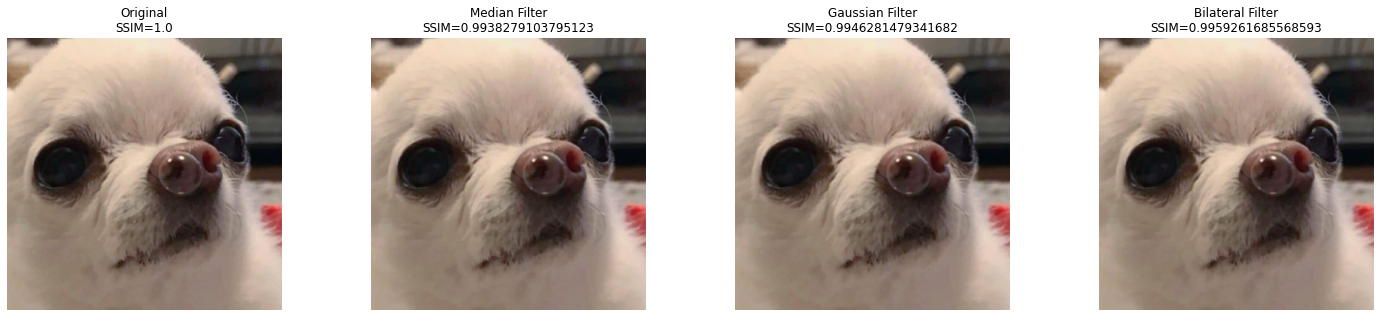

In [80]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(25,5))

ax1.imshow(img)
ax1.set_title(f"Original\nSSIM={ssim_1}")
ax1.axis('off')

ax2.imshow(img_mean)
ax2.set_title(f"Median Filter\nSSIM={ssim_2}")
ax2.axis('off')

ax3.imshow(img_gaussian)
ax3.set_title(f"Gaussian Filter\nSSIM={ssim_3}")
ax3.axis('off')

ax4.imshow(img_bilateral)
ax4.set_title(f"Bilateral Filter\nSSIM={ssim_4}")
ax4.axis('off')

# Task 4 

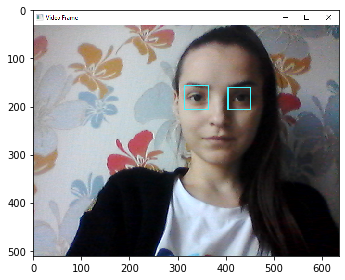

In [87]:
img = io.imread('eye.png')
io.imshow(img)